# Avocado Project

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df =pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Data preprocessing 

In [6]:
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [7]:
duplicates = df.duplicated()
print('Number of duplicate rows:', duplicates.sum())

Number of duplicate rows: 0


# Feature Engineering

In [8]:
# Feature engineering: calculate average price over 4-week period
#We create a new feature, the average price over a 4-week period, using the rolling() method.
df['AvgPrice4Weeks'] = df['AveragePrice'].rolling(window=4).mean()
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  AvgPrice4Weeks  
0                Albany             NaN  
1                Albany             NaN  
2                Albany             NaN  
3                Albany          1.1725  
4                Albany          1.1600  
...                 ...             ...  
18244  WestTexNewMexico          1.5825  
18245  WestTexNewMexico          1.6175  
18246  WestTexNewMexico          1.6950  
18247  WestTexNewMexico          1.7850  
18248  WestTexNewMexico          1.7825  

[18249 rows x 14 columns]

In [9]:
print(df.isnull().sum())

Date              0
AveragePrice      0
Total Volume      0
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
AvgPrice4Weeks    3
dtype: int64


In [10]:
df=df.dropna()
print(df.isnull().sum())
df.head()

Date              0
AveragePrice      0
Total Volume      0
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
AvgPrice4Weeks    0
dtype: int64


Date  AveragePrice  Total Volume     4046       4225   4770  \
3  2015-12-06          1.08      78992.15  1132.00   71976.41  72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39  75.78   
5  2015-11-22          1.26      55979.78  1184.27   48067.99  43.61   
6  2015-11-15          0.99      83453.76  1368.92   73672.72  93.26   
7  2015-11-08          0.98     109428.33   703.75  101815.36  80.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   
5     6683.91     6556.47      127.44          0.0  conventional  2015   
6     8318.86     8196.81      122.05          0.0  conventional  2015   
7     6829.22     6266.85      562.37          0.0  conventional  2015   

   region  AvgPrice4Weeks  
3  Albany          1.1725  
4  Albany          1.1600  
5  Albany          1.1375  
6  Albany          1.1525  
7  Albany          1.1275

In [14]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18246 entries, 3 to 18248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            18246 non-null  datetime64[ns]
 1   AveragePrice    18246 non-null  float64       
 2   Total Volume    18246 non-null  float64       
 3   4046            18246 non-null  float64       
 4   4225            18246 non-null  float64       
 5   4770            18246 non-null  float64       
 6   Total Bags      18246 non-null  float64       
 7   Small Bags      18246 non-null  float64       
 8   Large Bags      18246 non-null  float64       
 9   XLarge Bags     18246 non-null  float64       
 10  type            18246 non-null  object        
 11  year            18246 non-null  int64         
 12  region          18246 non-null  object        
 13  AvgPrice4Weeks  18246 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memo

In [17]:
import pandas as pd

# Assuming 'Date' is your datetime column
df = df.assign(
    order_month=df['Date'].dt.month_name(),
    order_week_of_the_year=df['Date'].dt.isocalendar().week,
    order_year=df['Date'].dt.year
)
df.shape


(18246, 17)

In [18]:
df.head()

Date  AveragePrice  Total Volume     4046       4225   4770  \
3 2015-12-06          1.08      78992.15  1132.00   71976.41  72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39  75.78   
5 2015-11-22          1.26      55979.78  1184.27   48067.99  43.61   
6 2015-11-15          0.99      83453.76  1368.92   73672.72  93.26   
7 2015-11-08          0.98     109428.33   703.75  101815.36  80.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   
5     6683.91     6556.47      127.44          0.0  conventional  2015   
6     8318.86     8196.81      122.05          0.0  conventional  2015   
7     6829.22     6266.85      562.37          0.0  conventional  2015   

   region  AvgPrice4Weeks order_month  order_week_of_the_year  order_year  
3  Albany          1.1725    December                      49        2015  
4  Albany          1.1600    November                      48        2015  
5  Albany          1.1375    November                      47        2015  
6  Albany          1.1525    November                      46        2015  
7  Albany          1.1275    November                      45        2015

In [20]:
def map_month_to_season(month_name):
    if month_name in ['March', 'April', 'May']:
        return 'Spring'
    elif month_name in ['June', 'July', 'August']:
        return 'Summer'
    elif month_name in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

In [21]:
# apply the function to create a new column named 'season'
df['season'] = df['order_month'].apply(map_month_to_season)

In [22]:
df.head()

Date  AveragePrice  Total Volume     4046       4225   4770  \
3 2015-12-06          1.08      78992.15  1132.00   71976.41  72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39  75.78   
5 2015-11-22          1.26      55979.78  1184.27   48067.99  43.61   
6 2015-11-15          0.99      83453.76  1368.92   73672.72  93.26   
7 2015-11-08          0.98     109428.33   703.75  101815.36  80.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   
5     6683.91     6556.47      127.44          0.0  conventional  2015   
6     8318.86     8196.81      122.05          0.0  conventional  2015   
7     6829.22     6266.85      562.37          0.0  conventional  2015   

   region  AvgPrice4Weeks order_month  order_week_of_the_year  order_year  \
3  Albany          1.1725    December                      49        2015   
4  Albany          1.1600    November                      48        2015   
5  Albany          1.1375    November                      47        2015   
6  Albany          1.1525    November                      46        2015   
7  Albany          1.1275    November                      45        2015   

   season  
3  Winter  
4  Autumn  
5  Autumn  
6  Autumn  
7  Autumn

In [23]:
# create a copy of df for obvious reasons
df1 = df.copy(deep=True)
#Now we dont need the date column so we will drop it
df1.drop(['Date','year'],axis=1, inplace=True)
df1.head(10)
df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
5              1.26      55979.78  1184.27   48067.99   43.61     6683.91   
6              0.99      83453.76  1368.92   73672.72   93.26     8318.86   
7              0.98     109428.33   703.75  101815.36   80.00     6829.22   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type            region  \
3         5677.40      133.76          0.0  conventional            Albany   
4         5986.26      197.69          0.0  conventional            Albany   
5         6556.47      127.44          0.0  conventional            Albany   
6         8196.81      122.05          0.0  conventional            Albany   
7         6266.85      562.37          0.0  conventional            Albany   
...           ...         ...          ...           ...               ...   
18244    13066.82      431.85          0.0       organic  WestTexNewMexico   
18245     8940.04      324.80          0.0       organic  WestTexNewMexico   
18246     9351.80       42.31          0.0       organic  WestTexNewMexico   
18247    10919.54       50.00          0.0       organic  WestTexNewMexico   
18248    11988.14       26.01          0.0       organic  WestTexNewMexico   

       AvgPrice4Weeks order_month  order_week_of_the_year  order_year  season  
3              1.1725    December                      49        2015  Winter  
4              1.1600    November                      48        2015  Autumn  
5              1.1375    November                      47        2015  Autumn  
6              1.1525    November                      46        2015  Autumn  
7              1.1275    November                      45        2015  Autumn  
...               ...         ...                     ...         ...     ...  
18244          1.5825    February                       5        2018  Winter  
18245          1.6175     January                       4        2018  Winter  
18246          1.6950     January                       3        2018  Winter  
18247          1.7850     January                       2        2018  Winter  
18248          1.7825     January                       1        2018  Winter  

[18246 rows x 16 columns]

In [24]:
le = LabelEncoder()
df1['type_encoded'] = le.fit_transform(df1['type'])
df1.drop('type',axis=1, inplace=True)
df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
5              1.26      55979.78  1184.27   48067.99   43.61     6683.91   
6              0.99      83453.76  1368.92   73672.72   93.26     8318.86   
7              0.98     109428.33   703.75  101815.36   80.00     6829.22   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags            region  AvgPrice4Weeks  \
3         5677.40      133.76          0.0            Albany          1.1725   
4         5986.26      197.69          0.0            Albany          1.1600   
5         6556.47      127.44          0.0            Albany          1.1375   
6         8196.81      122.05          0.0            Albany          1.1525   
7         6266.85      562.37          0.0            Albany          1.1275   
...           ...         ...          ...               ...             ...   
18244    13066.82      431.85          0.0  WestTexNewMexico          1.5825   
18245     8940.04      324.80          0.0  WestTexNewMexico          1.6175   
18246     9351.80       42.31          0.0  WestTexNewMexico          1.6950   
18247    10919.54       50.00          0.0  WestTexNewMexico          1.7850   
18248    11988.14       26.01          0.0  WestTexNewMexico          1.7825   

      order_month  order_week_of_the_year  order_year  season  type_encoded  
3        December                      49        2015  Winter             0  
4        November                      48        2015  Autumn             0  
5        November                      47        2015  Autumn             0  
6        November                      46        2015  Autumn             0  
7        November                      45        2015  Autumn             0  
...           ...                     ...         ...     ...           ...  
18244    February                       5        2018  Winter             1  
18245     January                       4        2018  Winter             1  
18246     January                       3        2018  Winter             1  
18247     January                       2        2018  Winter             1  
18248     January                       1        2018  Winter             1  

[18246 rows x 16 columns]

In [25]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 3 categorical variables

The categorical variables : ['region', 'order_month', 'season']


In [26]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 13 numerical variables

The numerical variables : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'AvgPrice4Weeks', 'order_week_of_the_year', 'order_year', 'type_encoded']


In [27]:
df1[numerical].describe().T

count           mean             std     min  \
AveragePrice            18246.0       1.406012        0.402694    0.44   
Total Volume            18246.0  850770.868112  3453815.084127   84.56   
4046                    18246.0  293056.463528  1265087.529155     0.0   
4225                    18246.0  295191.684457  1204215.858379     0.0   
4770                    18246.0   22843.478304   107472.506792     0.0   
Total Bags              18246.0  239677.159411   986319.036002     0.0   
Small Bags              18246.0  182223.215149   746236.541609     0.0   
Large Bags              18246.0   54347.006285   243985.029707     0.0   
XLarge Bags             18246.0    3106.937265    17694.304357     0.0   
AvgPrice4Weeks          18246.0        1.40596        0.383841    0.52   
order_week_of_the_year  18246.0      25.231229       15.481687     1.0   
order_year              18246.0    2016.148087          0.9399  2015.0   
type_encoded            18246.0            0.5        0.500014     0.0   

                              25%        50%          75%          max  
AveragePrice                  1.1       1.37         1.66         3.25  
Total Volume            10836.465   107404.0   433104.805  62505646.52  
4046                     854.6775   8652.635  111046.1575  22743616.17  
4225                    3008.0975   29055.72    150247.51  20470572.61  
4770                          0.0    185.055      6244.02   2546439.11  
Total Bags                5084.71  39764.815   110787.825  19373134.37  
Small Bags               2847.965  26377.805    83337.835   13384586.8  
Large Bags               128.0175   2649.285    22036.045   5719096.61  
XLarge Bags                   0.0        0.0     133.0025    551693.65  
AvgPrice4Weeks             1.1075     1.3675       1.6575        3.075  
order_week_of_the_year       11.0       25.0         39.0         53.0  
order_year                 2015.0     2016.0       2017.0       2018.0  
type_encoded                  0.0        0.5          1.0          1.0

# Visualization

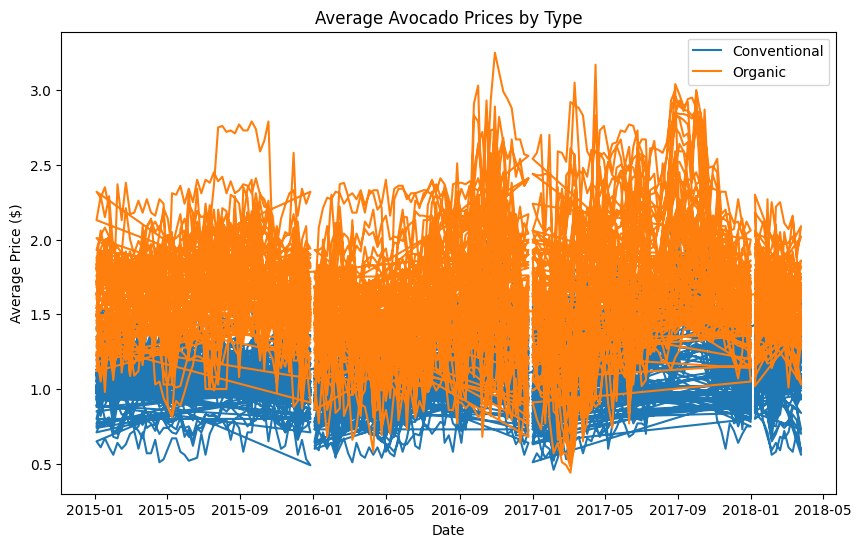

In [29]:
# Time series plot of average price over time
plt.figure(figsize=(10, 6))
plt.plot(df[df['type']=='conventional']['Date'], df[df['type']=='conventional']['AveragePrice'], label='Conventional')
plt.plot(df[df['type']=='organic']['Date'], df[df['type']=='organic']['AveragePrice'], label='Organic')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.title('Average Avocado Prices by Type')
plt.legend()

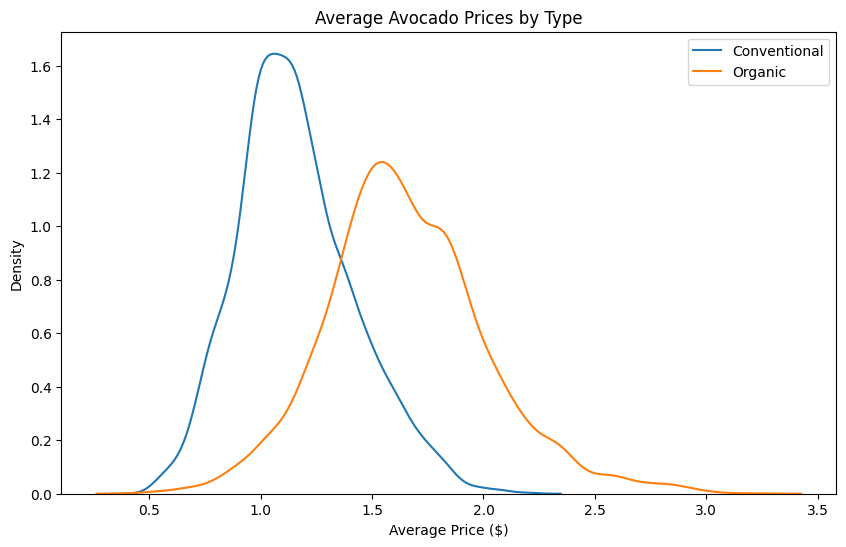

In [30]:
# Density plot of average price over time
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['type']=='conventional']['AveragePrice'], label='Conventional')
sns.kdeplot(df[df['type']=='organic']['AveragePrice'], label='Organic')
plt.xlabel('Average Price ($)')
plt.ylabel('Density')
plt.title('Average Avocado Prices by Type')
plt.legend()

In [31]:
# Compute the average price for each avocado type
avg_price_conventional = df[df['type']=='conventional']['AveragePrice'].mean()
avg_price_organic = df[df['type']=='organic']['AveragePrice'].mean()

avg_price_df = pd.DataFrame({'Type': ['Conventional', 'Organic'], 'Average Price': [avg_price_conventional, avg_price_organic]})
fig = px.pie(avg_price_df, names='Type', values='Average Price', hole=0.055, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Average Avocado Price by Type')
fig.show()

Text(0.5, 1.0, 'Distribution of Average Avocado Prices by Region')

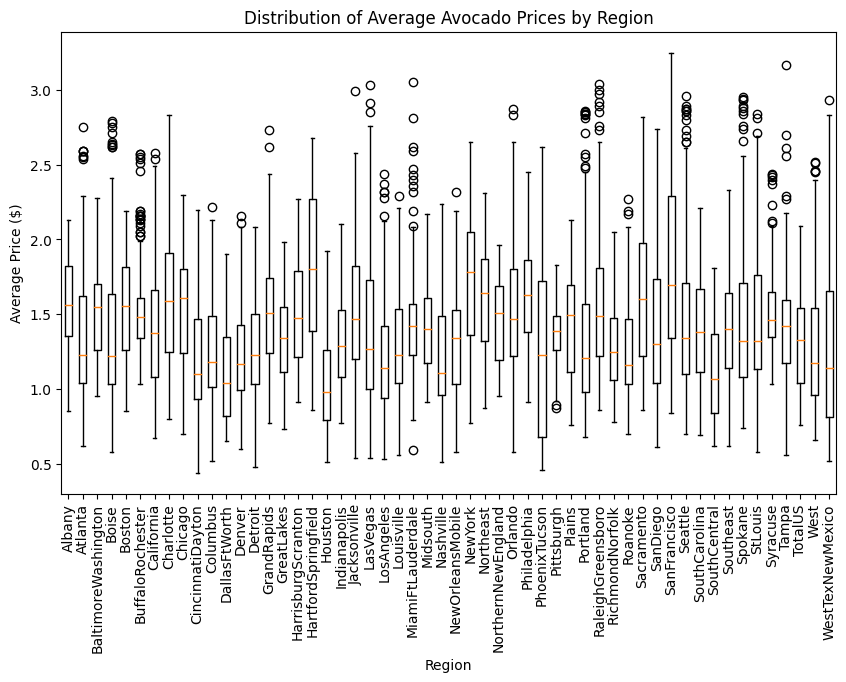

In [32]:
# Box plot of average price by region
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['region']==r]['AveragePrice'] for r in df['region'].unique()])
plt.xticks(range(1, len(df['region'].unique())+1), df['region'].unique(), rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.title('Distribution of Average Avocado Prices by Region')

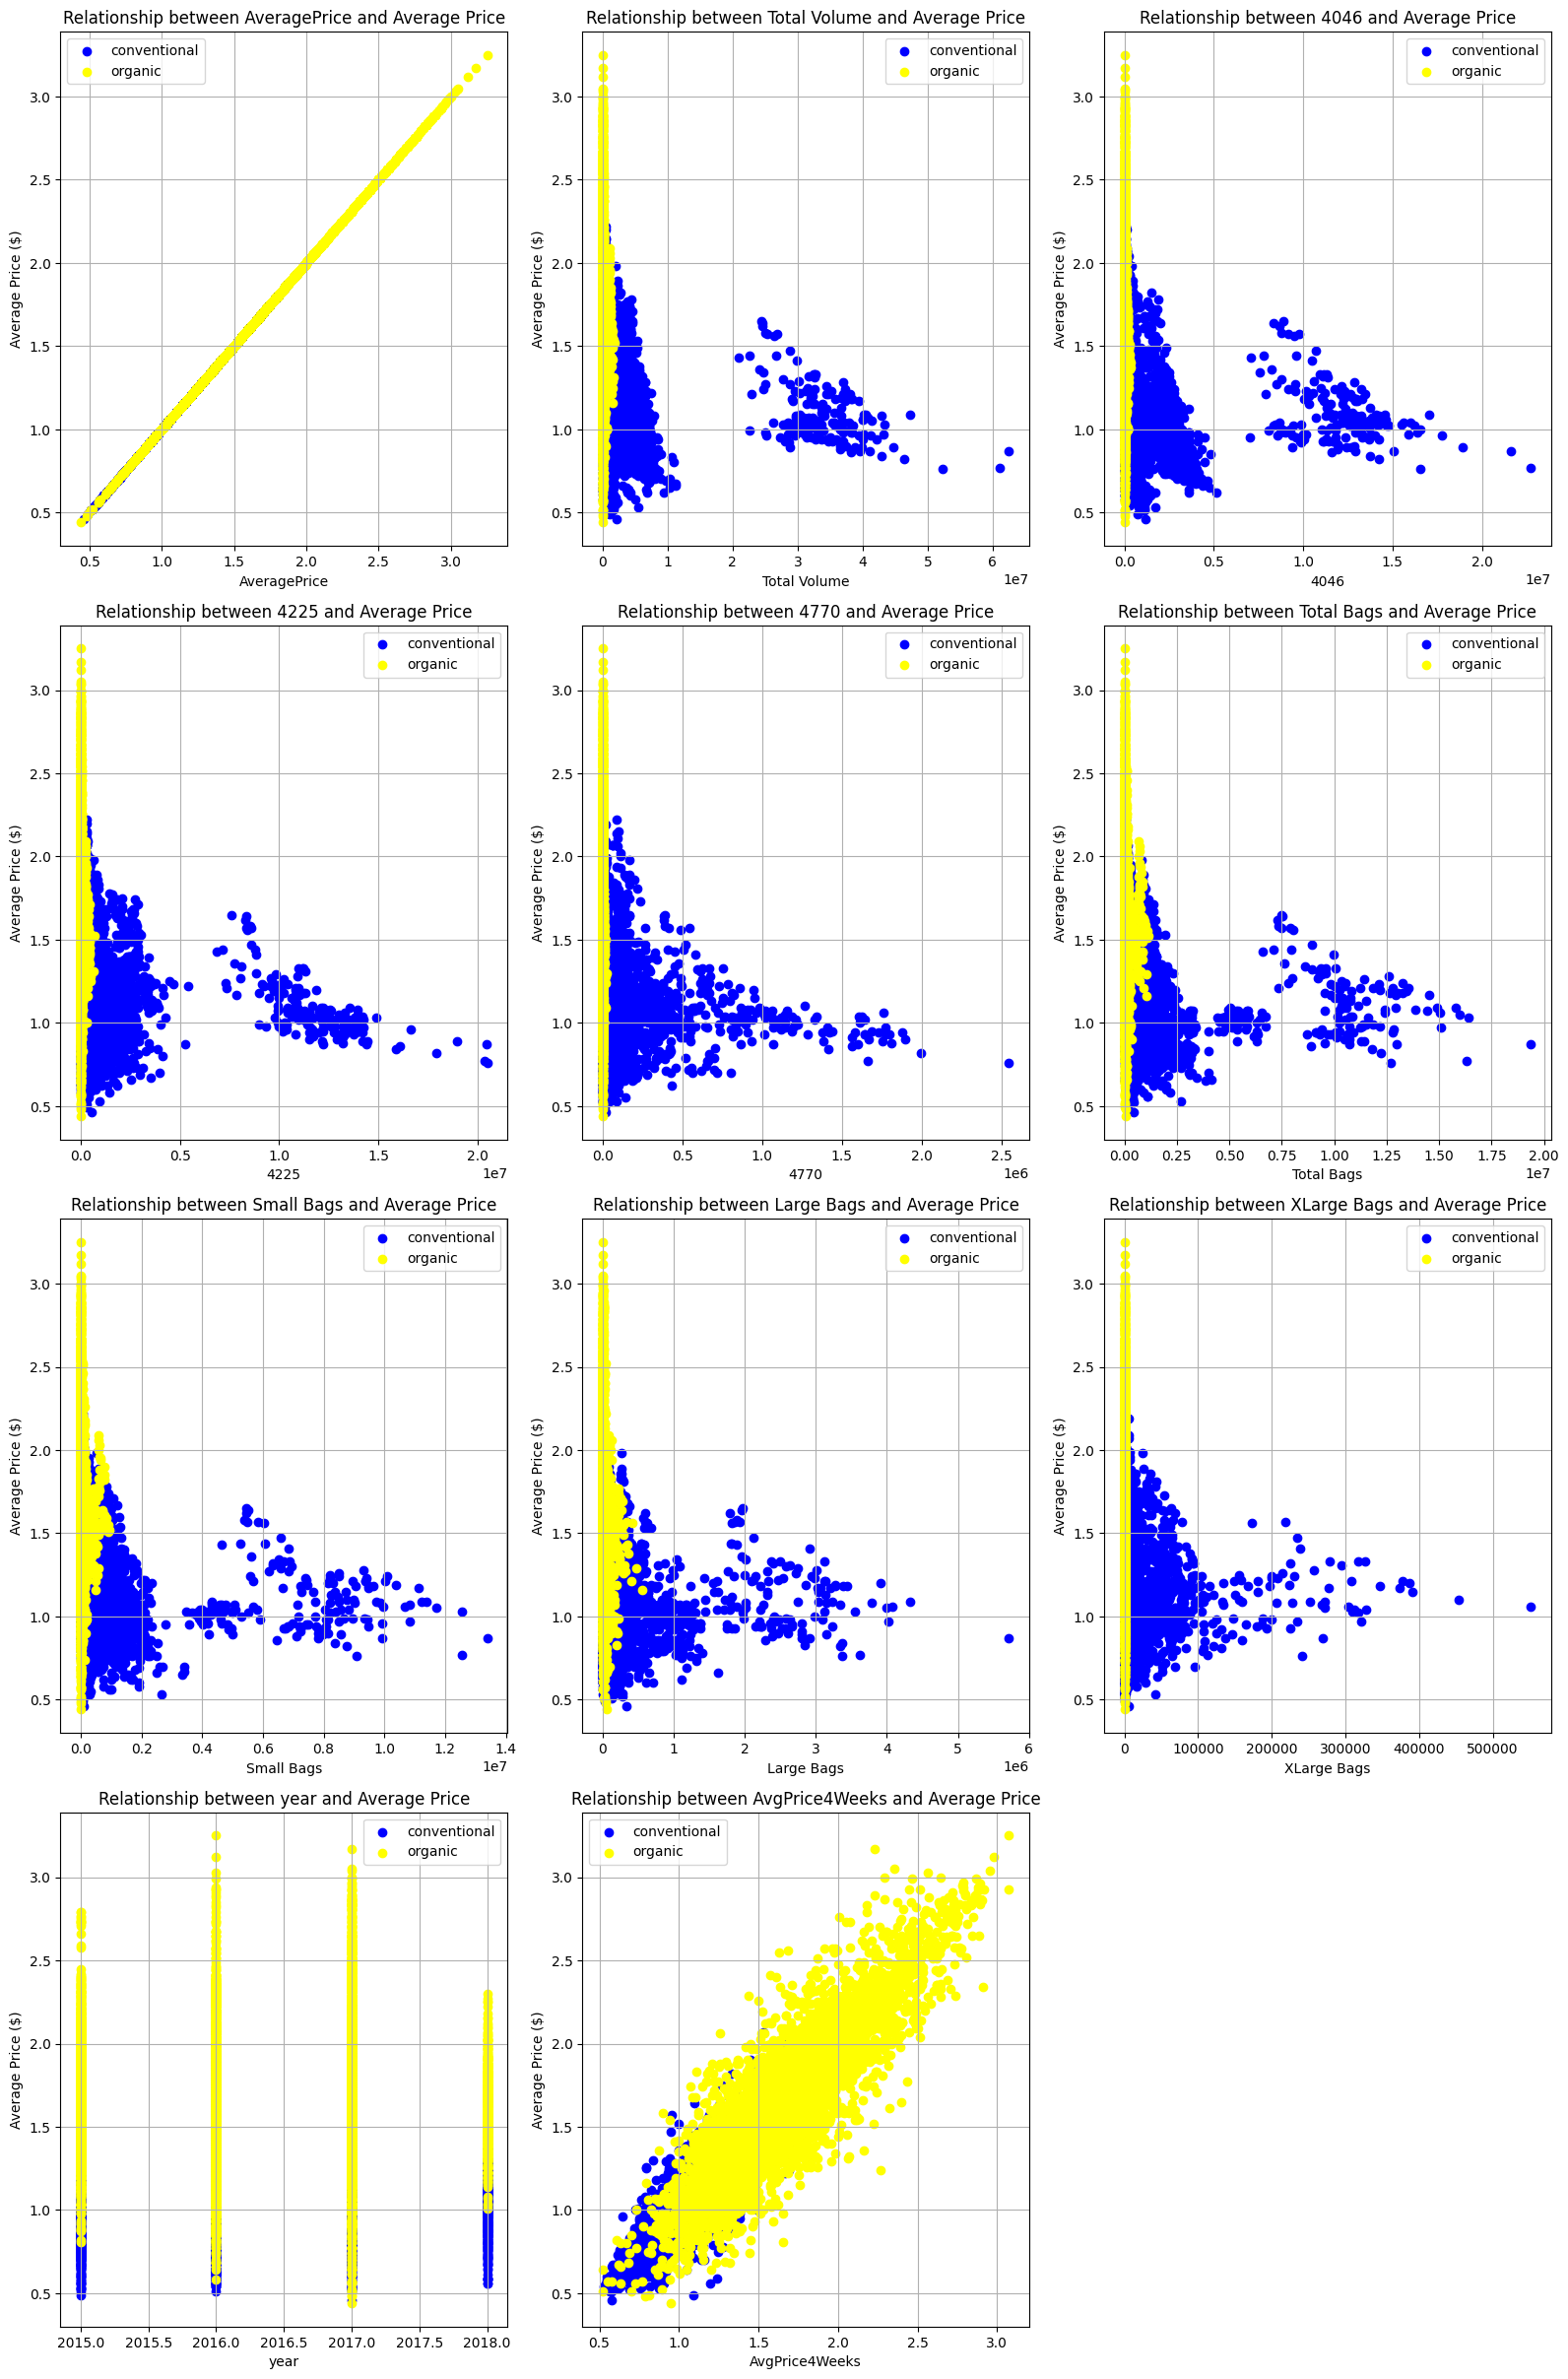

In [33]:
# Define the colors for each avocado type
colors = {'conventional': 'blue', 'organic': 'yellow'}
# Create a scatter plot between each numerical column and AveragePrice
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a scatter plot between each numerical column and AveragePrice
fig = plt.figure(figsize=(16, 6*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    ax1 = fig.add_subplot(len(numerical_cols), 3, i+1)
    for avocado_type, color in colors.items():
        mask = df['type'] == avocado_type
        ax1.scatter(df.loc[mask, col], df.loc[mask, 'AveragePrice'], c=color, label=avocado_type)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Average Price ($)')
    ax1.set_title(f'Relationship between {col} and Average Price')
    ax1.grid()
    ax1.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Average Avocado Prices')

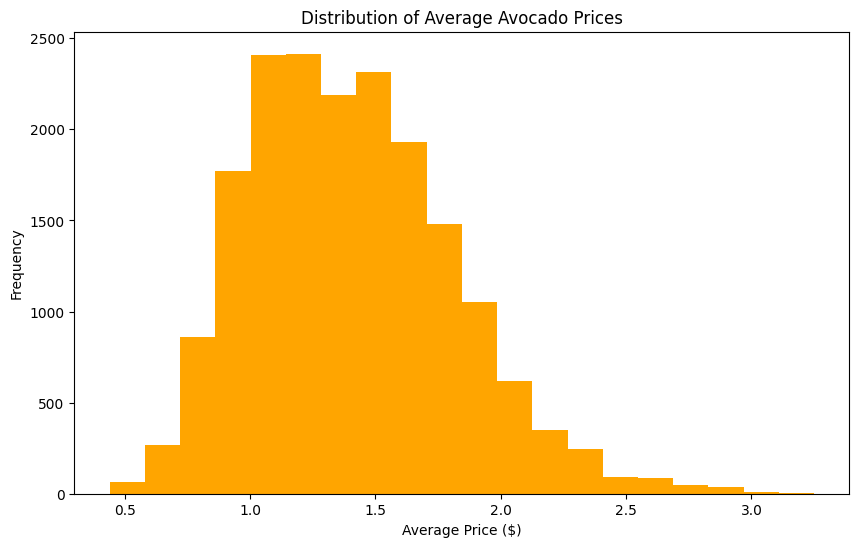

In [34]:
# Histogram of average price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['AveragePrice'], bins=20,color='orange')
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Avocado Prices')

In [35]:
region_means = df.groupby('region')['AveragePrice'].mean()

# Create the pie plot
colors = px.colors.qualitative.Set2
fig = px.pie(values=region_means, names=region_means.index, color=region_means.index, color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Average Avocado Prices by Region (Conventional vs. Organic)')
fig.show()

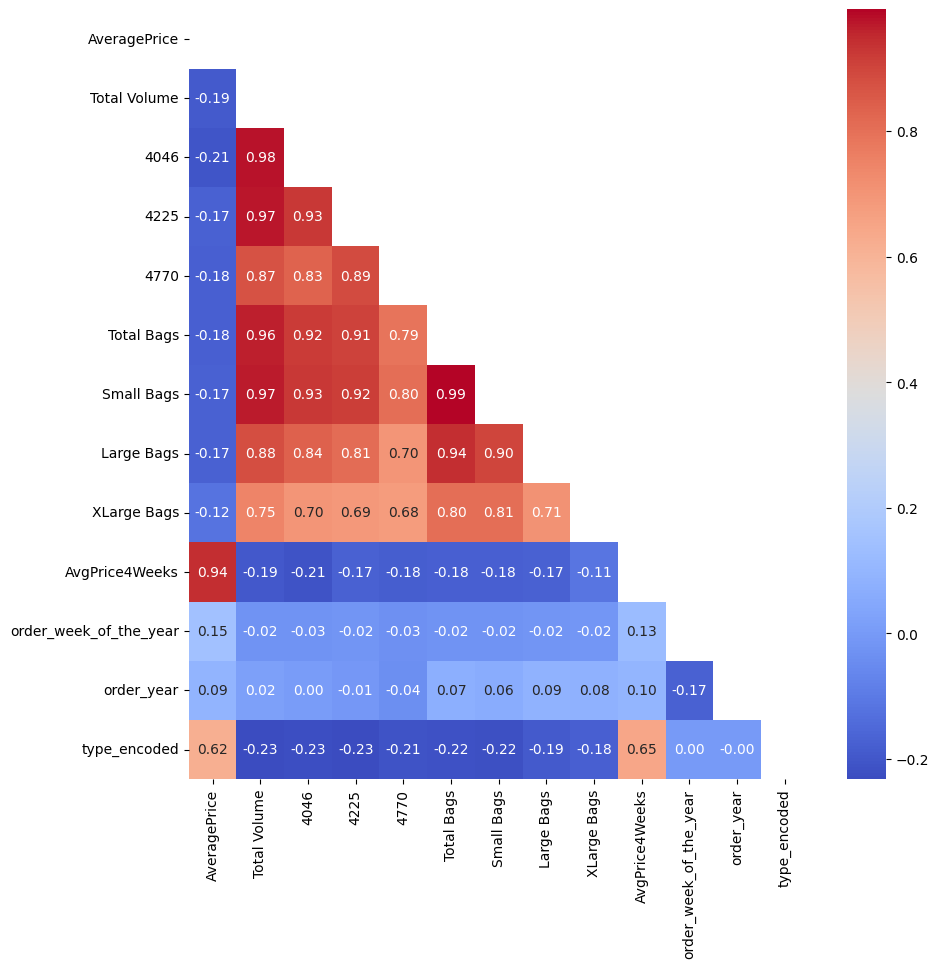

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[np.number])

# Handle missing values (you can choose a suitable strategy)
numeric_df = numeric_df.fillna(0)  # Replace missing values with 0

# Correlation matrix heat map with annotations and mask
plt.figure(figsize=(10, 10))
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()


# Feature Selection

In [40]:
# we have 13 numerical featuers so we will choose the best 8 features to train our models on it.
# we wil use SelectKBest technique
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
X = df1[numerical_cols].drop('AveragePrice', axis=1)
y = df1['AveragePrice']

# Apply the f_regression test to select the 8 most relevant features
selector = SelectKBest(f_regression, k=9)
X_new = selector.fit_transform(X, y)

# Print the names of the selected features
mask = selector.get_support()  # list of booleans for selected features
selected_features = X.columns[mask]
print(selected_features)

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'AvgPrice4Weeks'],
      dtype='object')


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model

In [42]:

def evaluate_models(X_train, X_test, y_train, y_test):
    # Train and evaluate a linear regression model
    print("Linear Regression:")
    model1 = LinearRegression()
    model1.fit(X_train, y_train)
    y_train_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")

    # Train and evaluate a Ridge regression model
    print("Ridge Regression:")
    model2 = Ridge(alpha=1.0)
    model2.fit(X_train, y_train)
    y_train_pred = model2.predict(X_train)
    y_test_pred = model2.predict(X_test)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")

    # Train and evaluate a polynomial regression model
    print("Lasso Regression on Polynomial features:")
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    train_features_poly = poly.fit_transform(X_train)
    test_features_poly = poly.transform(X_test)
    model3 = Lasso()
    model3.fit(train_features_poly,y_train)
    test_pred =model3.predict(test_features_poly)
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
    print("Training score:", r2_score(y_train, y_train_pred))
    print("Testing score:", r2_score(y_test, y_test_pred),"\n")

    # Print the name of the best model
    models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
    scores = [r2_score(y_test, model.predict(X_test)) for model in [model1, model2]]
    score = r2_score(y_test, model3.predict(test_features_poly))
    scores.append(score)
    best_model = models[np.argmax(scores)]
    print("\n")
    print("Best model:", best_model , "With score: ",np.max(scores)*100,"%")

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
evaluate_models(X_train, X_test, y_train, y_test)

Linear Regression:
Training MSE: 0.017762088649459384
Testing MSE: 0.01748165952236115
Training score: 0.8907147591855266
Testing score: 0.8911745945996068 

Ridge Regression:
Training MSE: 0.017765524488253696
Testing MSE: 0.017439699357786873
Training score: 0.8906936194154552
Testing score: 0.8914358016042748 

Lasso Regression on Polynomial features:
Training MSE: 0.017765524488253696
Testing MSE: 0.017439699357786873
Training score: 0.8906936194154552
Testing score: 0.8914358016042748 



Best model: Ridge Regression With score:  89.14358016042748 %


# Tune Model Parameters

In [45]:
#As we know the best model is Ridge regression so that we will apply tuning on it with GridSearchCV
# Define the parameter grid for alpha and solver
param_grid = {
    'alpha': [1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.0, 1.e+01,
      1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06],
    'max_iter': [100,400, 500, 1000]
}

# Create a Ridge object
ridge = Ridge()

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2',n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'alpha': 1e-06, 'max_iter': 100}
Best score:  0.8905369203778498


In [46]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print("Training score:", r2_score(y_train, y_train_pred)*100,"%")
print("Testing score:", r2_score(y_test, y_test_pred)*100,"%")

Training score: 89.07068943470891 %
Testing score: 89.13839639763458 %


In [47]:
mape_model = mean_absolute_percentage_error(y_test, y_test_pred)
print("MAPE of Ridge model:", mape_model*100,"%")

MAPE of Ridge model: 6.831031679177328 %


# Saving model

In [49]:
import pickle
filename='avocado_project.pkl'
pickle.dump(ridge,open(filename,'wb'))

# Conclusion

In [52]:
loaded_model=pickle.load(open('avocado_project.pkl','rb'))
loaded_model.fit(X_train,y_train)
result=loaded_model.score(X_test,y_test)

In [62]:
a=np.array(y_test)
predicted=np.array(loaded_model.predict(X_test))
result=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
result.head(20)

original  predicted
0       1.61   1.631245
1       0.90   1.363487
2       1.33   1.275455
3       1.96   1.856428
4       1.03   1.324231
5       1.70   1.782200
6       1.40   1.428170
7       1.06   1.113736
8       1.44   1.309469
9       1.80   1.778154
10      1.08   0.963118
11      1.17   1.086850
12      1.41   1.229914
13      1.96   2.131948
14      1.08   1.087236
15      1.45   2.049403
16      1.65   1.653449
17      1.48   1.488343
18      1.73   1.863851
19      1.64   1.516669